<a href="https://colab.research.google.com/github/yankovairyna-da/Sales-Analytics/blob/main/Sales_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth # Авторизація в Google/Google authorization
auth.authenticate_user()
from google.cloud import bigquery # Створюємо клієнт BigQuery/Creating a BigQuery client
project_id = "data-analytics-mate"
client = bigquery.Client(project = "data-analytics-mate")


In [ ]:
# Створення запиту SQL/Creating an SQL query
query = """
SELECT
  s.date,
  s.ga_session_id,
  sp.continent,
  sp.country,
  sp.device,
  sp.browser,
  sp.mobile_model_name,
  sp.operating_system,
  sp.language,
  sp.name AS traffic_source,
  sp.channel,
  acs.account_id,
  a.is_verified,
  a.is_unsubscribed,
  p.category,
  p.name,
  p.price,
  p.short_description
FROM `data-analytics-mate.DA.session` s
LEFT JOIN `data-analytics-mate.DA.session_params` sp
  ON s.ga_session_id = sp.ga_session_id
LEFT JOIN `data-analytics-mate.DA.account_session` acs
  ON s.ga_session_id = acs.ga_session_id
LEFT JOIN `data-analytics-mate.DA.order` o
  ON o.ga_session_id = s.ga_session_id
LEFT JOIN `data-analytics-mate.DA.product` p
  ON p.item_id = o.item_id
LEFT JOIN `data-analytics-mate.DA.account` a
  ON a.id = acs.account_id
"""

df = client.query(query).to_dataframe()
df.head() # Виведення датафрейму/Dataframe output


,date,ga_session_id,continent,country,device,browser,mobile_model_name,operating_system,language,traffic_source,channel,account_id,is_verified,is_unsubscribed,category,name,price,short_description
0,2020-11-01,5760483956,Americas,United States,desktop,Chrome,Safari,Macintosh,zh,<Other>,Paid Search,<NA>,<NA>,<NA>,Bookcases & shelving units,VITTSJÖ,609.0,"Shelving unit with laptop table, 202x36x175 cm"
1,2020-11-01,7115337200,Europe,United Kingdom,desktop,Chrome,Chrome,Web,en-us,(organic),Organic Search,<NA>,<NA>,<NA>,Bookcases & shelving units,VITTSJÖ,609.0,"Shelving unit with laptop table, 202x36x175 cm"
2,2020-11-01,3978035233,Europe,Norway,mobile,Chrome,<Other>,Web,zh,(direct),Direct,<NA>,<NA>,<NA>,Tables & desks,RÅSKOG,189.0,"Trolley, 35x45x78 cm"
3,2020-11-01,9648986282,Africa,Nigeria,mobile,Chrome,<Other>,Android,es-es,(direct),Direct,<NA>,<NA>,<NA>,Bookcases & shelving units,VITTSJÖ,609.0,"Shelving unit with laptop table, 202x36x175 cm"
4,2020-11-01,4393441533,Asia,China,desktop,Chrome,Chrome,Windows,en-us,(direct),Direct,<NA>,<NA>,<NA>,Bookcases & shelving units,VITTSJÖ,609.0,"Shelving unit with laptop table, 202x36x175 cm"


In [ ]:
# Основні бібліотеки для аналізу / Basic libraries for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.info() # Перевірка типів даних/Data type checking

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349545 entries, 0 to 349544
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   date               349545 non-null  dbdate 
 1   ga_session_id      349545 non-null  Int64  
 2   continent          349545 non-null  object 
 3   country            349545 non-null  object 
 4   device             349545 non-null  object 
 5   browser            349545 non-null  object 
 6   mobile_model_name  349545 non-null  object 
 7   operating_system   349545 non-null  object 
 8   language           235279 non-null  object 
 9   traffic_source     349545 non-null  object 
 10  channel            349545 non-null  object 
 11  account_id         27945 non-null   Int64  
 12  is_verified        27945 non-null   Int64  
 13  is_unsubscribed    27945 non-null   Int64  
 14  category           33538 non-null   object 
 15  name               33538 non-null   object 
 16  pr

In [ ]:
# Конвертуємо стовпці до формату datetime/Convert columns to datetime format
df['date'] = pd.to_datetime(df['date'], format="%m/%d/%Y", errors='coerce')
df.info() # Перевірка типів даних/Data type checking

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349545 entries, 0 to 349544
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   date               349545 non-null  datetime64[ns]
 1   ga_session_id      349545 non-null  Int64         
 2   continent          349545 non-null  object        
 3   country            349545 non-null  object        
 4   device             349545 non-null  object        
 5   browser            349545 non-null  object        
 6   mobile_model_name  349545 non-null  object        
 7   operating_system   349545 non-null  object        
 8   language           235279 non-null  object        
 9   traffic_source     349545 non-null  object        
 10  channel            349545 non-null  object        
 11  account_id         27945 non-null   Int64         
 12  is_verified        27945 non-null   Int64         
 13  is_unsubscribed    27945 non-null   Int64   

In [ ]:
df.describe() # Основна статистика/ Basic statistics

,date,ga_session_id,account_id,is_verified,is_unsubscribed,price
count,349545,349545.0,27945.0,27945.0,27945.0,33538.000000
mean,2020-12-16 12:42:00.602497536,4992250296.631739,659005.065557,0.71698,0.16944,953.298679
min,2020-11-01 00:00:00,1205.0,636133.0,0.0,0.0,3.000000
25%,2020-11-26 00:00:00,2493646855.0,647576.0,0.0,0.0,170.000000
50%,2020-12-15 00:00:00,4988476074.0,658952.0,1.0,0.0,445.000000
75%,2021-01-08 00:00:00,7491286508.0,670414.0,1.0,0.0,1195.000000
max,2021-01-31 00:00:00,9999997129.0,681962.0,1.0,1.0,9585.000000
std,NaN,2887450949.537772,13216.529465,0.450474,0.375147,1317.001775


In [ ]:
print(f"Total number of columns: {df.shape[1]}") # Загальна кількість колонок/Total number of columns
print("\n")
num_cols = df.select_dtypes(include="number").columns
print("Total number of numeric columns:", len(num_cols), num_cols) # Загальна кількість числових колонок/Total number of numeric columns
cat_cols = df.select_dtypes(include="object").columns
print("Total number of categorical columns:", len(cat_cols), cat_cols) # Загальна кількість колонок категоріального типу/Total number of categorical columns
print("\n")
date_cols = df.select_dtypes(include="datetime").columns
print("Total number of datetime columns:", len(date_cols), date_cols) # Загальна кількість колонок типу datetime/Total number of datetime columns
print("\n")
print(f"Number of unique sessions: {df["ga_session_id"].nunique()}") # Кількість унікальних сесій/ Number of unique sessions
print("\n")
print(f"Time from: {df['date'].min().date()}, untill: {df['date'].max().date()}") # Період часу/ Time
print("\n")
print(f"Number of missing values ​​in the table :")# Визначення пропущених значень в таблицях/Identifying missing values ​​in tables
print(df.isna().sum())
print("\n")
missing = df.isna().sum().sort_values(ascending=False) # Колонки з найбільшою кількістю пропущених значень/Columns with the most missing values
print(f"Columns with the most missing values:")
print(missing[missing > 0])
print("\n")
print(f"Percentage of passes: {df.isna().mean() * 100}") # Відсоток пропусків/Percentage of passes
print("\n")
print(f"Number of categories: {df["category"].nunique()}") # Кількість категорій/Number of categories
print("\n")
print("Category:") # Назви категорій/Category names
print(df["category"].unique())
print("\n")
print(f"Number of unique accounts: {df["account_id"].nunique()}") # Кількість унікальних акаунтів/Number of unique accounts


Total number of columns: 18


Total number of numeric columns: 5 Index(['ga_session_id', 'account_id', 'is_verified', 'is_unsubscribed',
       'price'],
      dtype='object')
Total number of categorical columns: 12 Index(['continent', 'country', 'device', 'browser', 'mobile_model_name',
       'operating_system', 'language', 'traffic_source', 'channel', 'category',
       'name', 'short_description'],
      dtype='object')


Total number of datetime columns: 1 Index(['date'], dtype='object')


Number of unique sessions: 349545


Time from: 2020-11-01, untill: 2021-01-31


Number of missing values ​​in the table :
date                      0
ga_session_id             0
continent                 0
country                   0
device                    0
browser                   0
mobile_model_name         0
operating_system          0
language             114266
traffic_source            0
channel                   0
account_id           321600
is_verified          321600
is_unsubscribe

#UA
З проведеного аналізу можна зробити висновок, що база даних містить 18 колонок, з яких 5 — числові, 12 — категоріальні та 1 колонка з датою.
Загальна кількість унікальних сесій становить 349 545, унікальних акаунтів - 27 945. Дані охоплюють період з 2020-11-01 по 2021-01-31.
Найбільшу кількість пропущених значень мають такі колонки:
- is_unsubscribed
- is_verified
- account_id
- short_description
- name
- category
- price
- language

Ймовірною причиною наявності пропущених значень є використання LEFT JOIN з метою збереження всіх сесій у вибірці. Зокрема:
- не всі сесії пов’язані з акаунтом користувача;
- частина сесій не завершується покупкою, тому відсутні дані про продукт (назва, категорія, ціна, опис);
- інформація про мову користувача передається не для всіх сесій.

#EN
Based on the analysis, the dataset contains 18 columns, including 5 numerical, 12 categorical, and 1 date column.
The total number of unique sessions is 349,545 and accounts- 27,945. The data covers the period from 2020-11-01 to 2021-01-31.
The columns with the highest number of missing values are:
- is_unsubscribed
- is_verified
- account_id
- short_description
- name
- category
- price
- language

The most likely reason for the missing values is the use of a LEFT JOIN in order to preserve all sessions in the dataset. In particular:
- not all sessions are associated with a user account;
- some sessions do not result in a purchase, which leads to missing product-related information (name, category, price, description);
- language information is not consistently captured for all sessions.

# Комплексний аналіз продажів і клієнтської бази/Comprehensive analysis of sales and customer base


In [ ]:
total_sales_continent = df.groupby("continent")['price'].sum().sort_values(ascending = False).head(3) # Визначаємо топ 3 континента з найбільми продажами
print("Top 3 continents with the highest sales:")
print(total_sales_continent) # Determine the top 3 continents with the highest sales
print("\n")
total_order_continent = df.groupby("continent")['ga_session_id'].count().sort_values(ascending = False).head(3) # Визначаємо топ 3 континента з найбільшою кількістю замовлень
print("Top 3 continents with the highest number of orders:")
print(total_order_continent) # Determine the top 3 continents with the largest number of orders
print("\n")
total_sales_country = df.groupby("country")['price'].sum().sort_values(ascending = False).head(5) # Визначаємо топ 5 країн з найбільми продажами
print("Top 5 countries with the highest sales:")
print(total_sales_country) # Determine the top 5 countries with the highest sales
print("\n")
total_order_country = df.groupby("country")['ga_session_id'].count().sort_values(ascending = False).head(5) # Визначаємо топ 5 країн з найбільми продажами
print("Top 5 countries with the highest number of orders:")
print(total_order_country) # Determine the top 5 countries with the largest number of orders
print("\n")
top_10_category = df.groupby("category")['price'].sum().sort_values(ascending = False).head(10) # Визначаємо топ 10 категорій за загальною сумою продажів
print("Top 10 categories by total sales:")
print(top_10_category) # Determine the top 10 categories with the highest sales

Top 3 continents with the highest sales:
continent
Americas    17665280.0
Asia         7601298.3
Europe       5934624.2
Name: price, dtype: float64


Top 3 continents with the highest number of orders:
continent
Americas    193179
Asia         83113
Europe       65135
Name: ga_session_id, dtype: Int64


Top 5 countries with the highest sales:
country
United States     13943553.9
India              2809762.0
Canada             2437921.0
United Kingdom      938317.9
France              710692.8
Name: price, dtype: float64


Top 5 countries with the highest number of orders:
country
United States     153470
India              32763
Canada             25994
United Kingdom     11003
France              6958
Name: ga_session_id, dtype: Int64


Top 10 categories by total sales:
category
Sofas & armchairs                   8388254.5
Chairs                              6147748.8
Beds                                4919725.0
Bookcases & shelving units          3640818.1
Cabinets & cupboards     

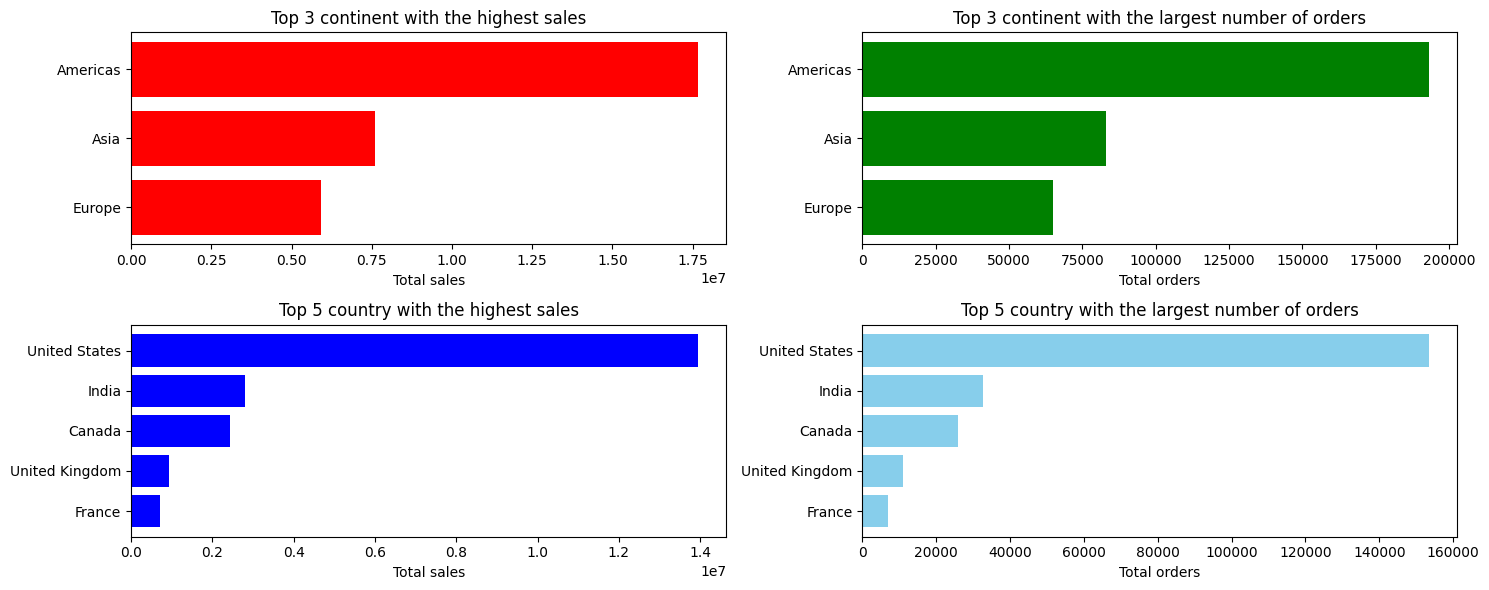

In [ ]:
# Аналіз продаж на континентах та країнах/Sales analysis by continent and country

# Топ 3 континента з найбільми продажами/Top 3 continents with the highest sales
fig, ax = plt.subplots(2, 2, figsize=(15, 6))
ax[0,0].barh(total_sales_continent.index, total_sales_continent, color="red")
ax[0,0].set_xlabel("Total sales")
ax[0,0].set_title("Top 3 continent with the highest sales")
ax[0,0].invert_yaxis()
# Топ 3 континента за кількістю замовлень/Top 3 continents with the largest number of orders
ax[0,1].barh(total_order_continent.index, total_order_continent,color="green")
ax[0,1].set_xlabel("Total orders")
ax[0,1].set_title("Top 3 continent with the largest number of orders")
ax[0,1].invert_yaxis()
# Топ 5 країн з найбільми продажами/Top 5 countries with the highest sales
ax[1,0].barh(total_sales_country.index, total_sales_country, color="blue")
ax[1,0].set_xlabel("Total sales")
ax[1,0].set_title("Top 5 country with the highest sales")
ax[1,0].invert_yaxis()
# Топ 5 країн за кількістю замовлень/Top 3 countries with the largest number of orders
ax[1,1].barh(total_order_country.index, total_order_country, color="skyblue")
ax[1,1].set_xlabel("Total orders")
ax[1,1].set_title("Top 5 country with the largest number of orders")
ax[1,1].invert_yaxis()

plt.tight_layout()
plt.show()

In [ ]:
# Визначаємо топ-10 категорій товарів у країні з найбільшими продажами/Determine the top 10 categories in the country with the highest sales
top10_categories_top_country = df[df["country"] == total_sales_country.idxmax()].groupby("category")["price"].sum().sort_values(ascending=False).head(10)
print(top10_categories_top_country)

category
Sofas & armchairs                   3707144.5
Chairs                              2619773.8
Beds                                2213058.0
Bookcases & shelving units          1567606.9
Cabinets & cupboards                 994545.5
Outdoor furniture                    929245.2
Tables & desks                       777865.0
Chests of drawers & drawer units     382388.0
Bar furniture                        330805.0
Children's furniture                 207575.0
Name: price, dtype: float64


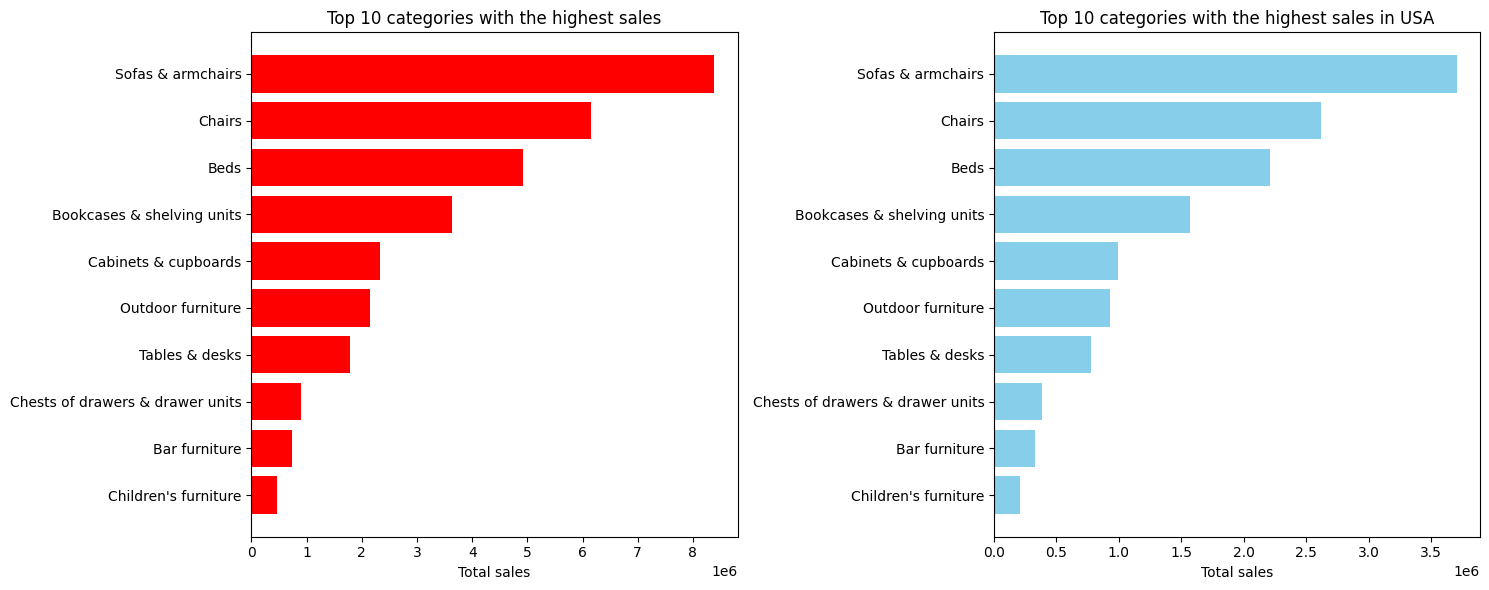

In [ ]:
# Побудова графіка топ-10 категорій товарів у країні з найбільшими продажами/Plotting a graph of the top 10 product categories in the country with the highest sales

# Топ-10 категорій загалом/Top 10 categories overall
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].barh(top_10_category.index, top_10_category, color="red")
ax[0].set_xlabel("Total sales")
ax[0].set_title("Top 10 categories with the highest sales")
ax[0].invert_yaxis()
# Топ-10 категорій у США/Top 10 categories in the USA
ax[1].barh(top10_categories_top_country.index, top10_categories_top_country,color="skyblue")
ax[1].set_xlabel("Total sales")
ax[1].set_title("Top 10 categories with the highest sales in USA")
ax[1].invert_yaxis()
plt.tight_layout()
plt.show()

#UA
Згідно з аналізом, країна з найбільшими продажами — США. Топ-10 категорій товарів за сумою продажів у США не відрізняються від загальної картини топ-10 категорій за всіма країнами. Це означає, що найбільш популярні категорії однакові як на рівні окремої країни, так і на глобальному рівні.

#EN

According to the analysis, the country with the highest sales is the USA. The top 10 product categories by sales in the USA do not differ from the overall top 10 categories across all countries. This indicates that the most popular categories are consistent both at the country level and globally.

In [ ]:
sales_device = df.groupby("device")['price'].sum() # Визначаємо суму продажів по девайсах/Determine the amount of sales by device
sales_device_percent = (sales_device / sales_device.sum()) * 100 # Переведення у відсотки від загальних продажів/Converting to a percentage of total sales
print("\nPercentage of device sales out of total sales:")
print(sales_device_percent)


Percentage of device sales out of total sales:
device
desktop    59.002245
mobile     38.734924
tablet      2.262831
Name: price, dtype: float64


In [ ]:
sales_traffic = df.groupby("traffic_source")['price'].sum() # Визначаємо суму продажів за джерелами трафіку/Determine the amount of sales by traffic source
sales_traffic_percent = (sales_traffic / sales_traffic.sum()) * 100 # Переведення у відсотки від загальних продажів/Converting to a percentage of total sales
print("\nPercentage of sales by traffic source out of total sales:")
print(sales_traffic_percent)


Percentage of sales by traffic source out of total sales:
traffic_source
(data deleted)     6.262836
(direct)          23.442345
(organic)         34.202840
(referral)        17.646386
<Other>           18.445594
Name: price, dtype: float64


In [ ]:
# Всі зареєстровані користувачі/All registered users
registered_users = df[df["account_id"].notna()]
print(f"Registered users: {len(registered_users)}\n")

# Кількість підтверджених email/Number of confirmed emails
verified_users = registered_users[registered_users["is_verified"] == 1]
print(f"Verified users: {len(verified_users)}\n")

# Кількість непідтверджених email/Number of unconfirmed emails
unverified_users = registered_users[registered_users["is_verified"] == 0]
print(f"Unverified users: {len(unverified_users)}\n")

# Відсоток/Percent
verified_percent = (len(verified_users) / len(registered_users)) * 100
print(f"Percentage of registered users with a confirmed email: {verified_percent:.2f}%")
print("\n")

# Кількість зареєстрованих користувачів по країнах / Number of registered users by country
top_country_stats = df[df["account_id"].notna()].groupby("country")["account_id"].count().sort_values(ascending=False).head(10)
print(f"\nTotal number of registered users by country:")
print(top_country_stats)

# Групуємо по країні та рахуємо загальну кількість та кількість підтверджених/Group by country and count the total number and the number of confirmed
country_stats = registered_users.groupby("country").agg(total_users=("account_id", "count"),verified_users=("is_verified", "sum"))

# Відсоток підтверджених/Percentage of confirmed
country_stats["verified_percent"] = (country_stats["verified_users"] / country_stats["total_users"]) * 100

# Сортуємо за відсотком/Sort by percentage
country_stats = country_stats.sort_values(by="total_users", ascending=False).head(10)
print(f"\nPercentage of registered users with a confirmed email by country:")
print(country_stats)

# Групуємо по континенту та рахуємо загальну кількість та кількість підтверджених/Group by continent and count the total number and the number of confirmed
continent_stats = registered_users.groupby("continent").agg(total_users=("account_id", "count"),verified_users=("is_verified", "sum"))

# Відсоток підтверджених/Percentage of confirmed
continent_stats["verified_percent"] = (continent_stats["verified_users"] / continent_stats["total_users"]) * 100

# Сортуємо за відсотком/Sort by percentage
continent_stats = continent_stats.sort_values(by="total_users", ascending=False)
print(f"\nPercentage of registered users with a confirmed email by continent:")
print(continent_stats)


Registered users: 27945

Verified users: 20036

Unverified users: 7909

Percentage of registered users with a confirmed email: 71.70%



Total number of registered users by country:
country
United States     12384
India              2687
Canada             2067
United Kingdom      859
France              553
Spain               536
Taiwan              500
China               490
Germany             490
Italy               386
Name: account_id, dtype: Int64

Percentage of registered users with a confirmed email by country:
                total_users  verified_users  verified_percent
country                                                      
United States         12384            8889         71.778101
India                  2687            1927         71.715668
Canada                 2067            1486          71.89163
United Kingdom          859             601         69.965076
France                  553             388         70.162749
Spain                   536           

In [ ]:
# Всі зареєстровані користувачі/All registered users
registered_users = df[df["account_id"].notna()]
# Кількість відписаних від розсилки користувачів/Number of users unsubscribed from the newsletter
unsubscribed_users = registered_users[registered_users["is_unsubscribed"] == 1]
print(f"Unsubscribed users: {len(unsubscribed_users)}\n")

# Кількість підписаних для розсилки користувачів/Number of users subscribed from the newsletter
subscribed_users = registered_users[registered_users["is_unsubscribed"] == 0]
print(f"Subscribed users: {len(subscribed_users)}\n")

# Відсоток відписаних від загальної кількості зареєстрованих/Percentage of unsubscribed from the total number of registered
unsubscribed_percent = (len(unsubscribed_users) / len(registered_users)) * 100
print(f"Percentage of unsubscribed users: {unsubscribed_percent:.2f}%\n")

# Групуємо по країні/Group by country
country_stats = registered_users.groupby("country").agg(total_users=("account_id", "count"),unsubscribed_users=("is_unsubscribed", "sum"))

# Відсоток відписаних по країнах/Percentage of unsubscribes by country
country_stats["unsubscribed_percent"] = (country_stats["unsubscribed_users"] / country_stats["total_users"] * 100)

# Сортуємо за кількістю зареєстрованих користувачів та беремо топ-10/Sort by the number of registered users and take the top 10
country_stats = country_stats.sort_values(by="total_users", ascending=False).head(10)
print("Percentage of unsubscribed users by country (top 10 by total users):")
print(country_stats)

# Групуємо по континенту/Group by continent
continent_stats = registered_users.groupby("continent").agg(total_users=("account_id", "count"),unsubscribed_users=("is_unsubscribed", "sum"))

# Відсоток відписаних по континентах/Percentage of unsubscribes by continent
continent_stats["unsubscribed_percent"] = (continent_stats["unsubscribed_users"] / continent_stats["total_users"] * 100)

# Сортуємо за кількістю зареєстрованих користувачів/Sort by the number of registered users
continent_stats = continent_stats.sort_values(by="total_users", ascending=False)
print("\nPercentage of unsubscribed users by continent:")
print(continent_stats)


Unsubscribed users: 4735

Subscribed users: 23210

Percentage of unsubscribed users: 16.94%

Percentage of unsubscribed users by country (top 10 by total users):
                total_users  unsubscribed_users  unsubscribed_percent
country                                                              
United States         12384                2125             17.159238
India                  2687                 484             18.012654
Canada                 2067                 356             17.223029
United Kingdom          859                 124              14.43539
France                  553                  85             15.370705
Spain                   536                  91             16.977612
Taiwan                  500                  77                  15.4
China                   490                  87             17.755102
Germany                 490                  71             14.489796
Italy                   386                  73             18.91191

In [ ]:
# Визначаємо загальні продажі непідписаних користувачів/Determine the total sales of unsubscribed users
total_sale_unsub = df.loc[df["is_unsubscribed"] == 1, "price"].sum()
print(f"Total sales of unsubcribed users: {total_sale_unsub}\n")

# Визначаємо загальні продажі підписаних користувачів/Determine the total sales of subscribed users
total_sale_sub = df.loc[df["is_unsubscribed"] == 0, "price"].sum()
print(f"Total sales of subcribed users: {total_sale_sub}")

Total sales of unsubcribed users: 431721.6

Total sales of subcribed users: 2150796.9


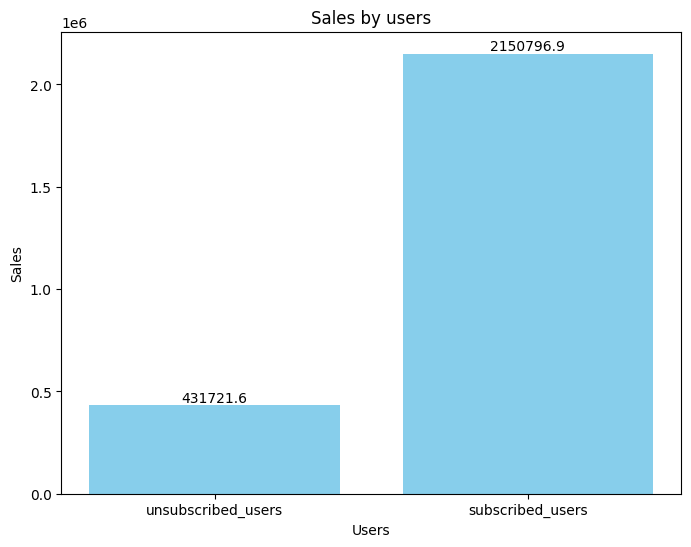

In [ ]:
# Будуємо графік для порівняння продаж підписаних і відписаних користувачів/Create a graph to compare sales of subscribed and unsubscribed users
users = ["unsubscribed_users", "subscribed_users"]
sales = [total_sale_unsub, total_sale_sub]
fig, ax = plt.subplots(figsize=(8, 6))
for i, v in enumerate(sales):
    ax.text(i, v, round(v, 2), ha="center", va="bottom")
ax.bar(users, sales, color="skyblue")
ax.set_title("Sales by users")
ax.set_xlabel("Users")
ax.set_ylabel("Sales")
plt.show()

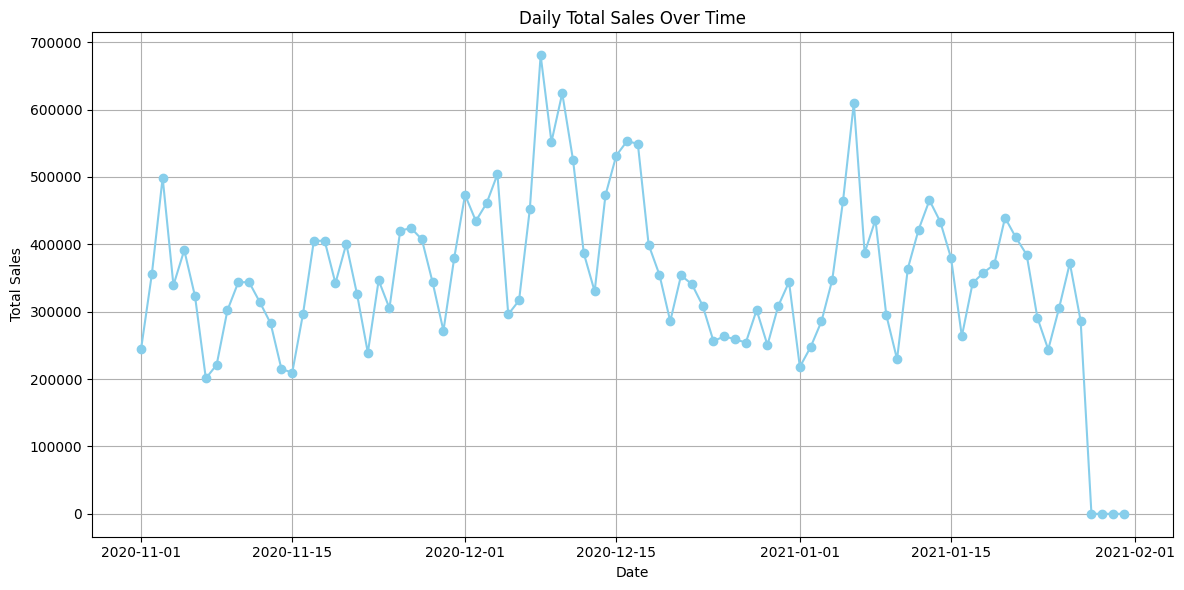

In [ ]:
# Групування: загальні продажі по кожній даті / Grouping: total sales by each date
daily_sales = df.groupby("date")["price"].sum().reset_index().sort_values("date")
df_sorted = df.sort_values("date")

# Створюємо графік/ Create a graph
plt.figure(figsize=(12,6))
plt.plot(daily_sales["date"], daily_sales["price"], color='skyblue', marker='o', linestyle='-')
plt.title("Daily Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

#UA
Згідно з аналізом щоденної динаміки продажів:
Пікові продажі спостерігаються у:
- Листопад 2020 — перша половина місяця
- Грудень 2020 — перша половина місяця
- Січень 2021 — перша половина місяця
Друга половина місяців демонструє спад продажів, що може бути пов’язано з:
- завершенням сезонних акцій
- скороченням активності користувачів після свят
- природною циклічністю покупок

#EN
Based on the analysis of daily sales dynamics:
Peak sales occur during:
- November 2020 — first half of the month
- December 2020 — first half of the month
- January 2021 — first half of the month
The second half of these months shows a decline in sales, which may be due to:
- the end of seasonal promotions
- educed customer activity after the holidays
- natural cyclicality in purchasing behavior

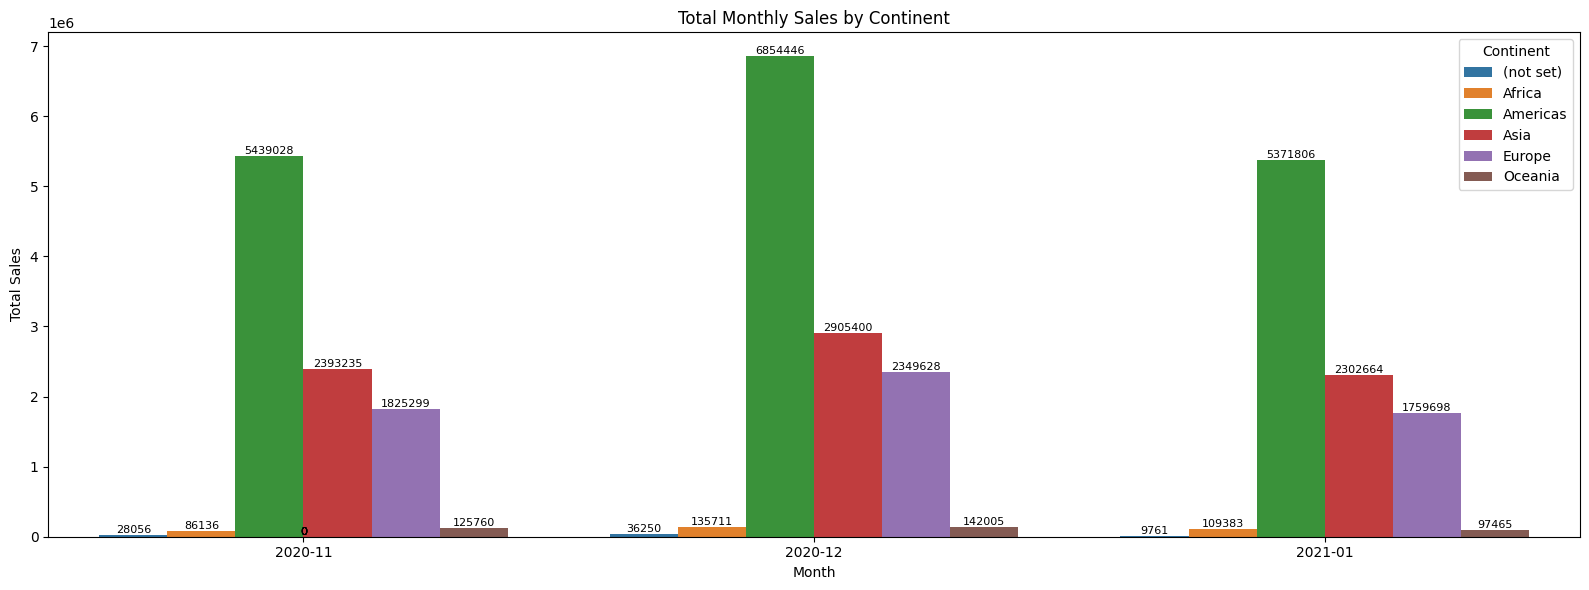

In [ ]:
 # Створюємо колонку "year_month" для агрегації за місяцем/Create a "year_month" column for aggregation by month
df["year_month"] = df["date"].dt.to_period("M")

# Групуємо за місяцем і континентом, рахуємо загальні продажі/Group by month and continent, calculate total sales
monthly_sales_continent = df.groupby(["year_month", "continent"])["price"].sum().reset_index()

# Створюємо графік динаміки продажів за континентом/Сreate a graph of sales dynamics by continent
plt.figure(figsize=(16,6))
ax = sns.barplot(data=monthly_sales_continent,x="year_month",y="price",hue="continent",errorbar=None)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width()/2,
        y=height,
        s=f"{height:.0f}",
        ha="center",
        va="bottom",
        fontsize=8
    )
plt.title("Total Monthly Sales by Continent")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.legend(title="Continent")
plt.tight_layout()
plt.show()


# UA
Згідно з аналізом загальних продажів по континентах:
- Найбільші продажі спостерігаються в Америці.
- Найменші продажі зафіксовані в Африці та Океанії.
Це свідчить про те, що американський ринок є найважливішим за обсягом продажів, тоді як Африка та Океанія роблять найменший внесок.
#EN
Based on the analysis of total sales by continent:
- Highest sales are observed in America.
- Lowest sales are recorded in Africa and Oceania.
- This indicates that the American market is the most significant in terms of sales volume, while Africa and Oceania contribute the least.

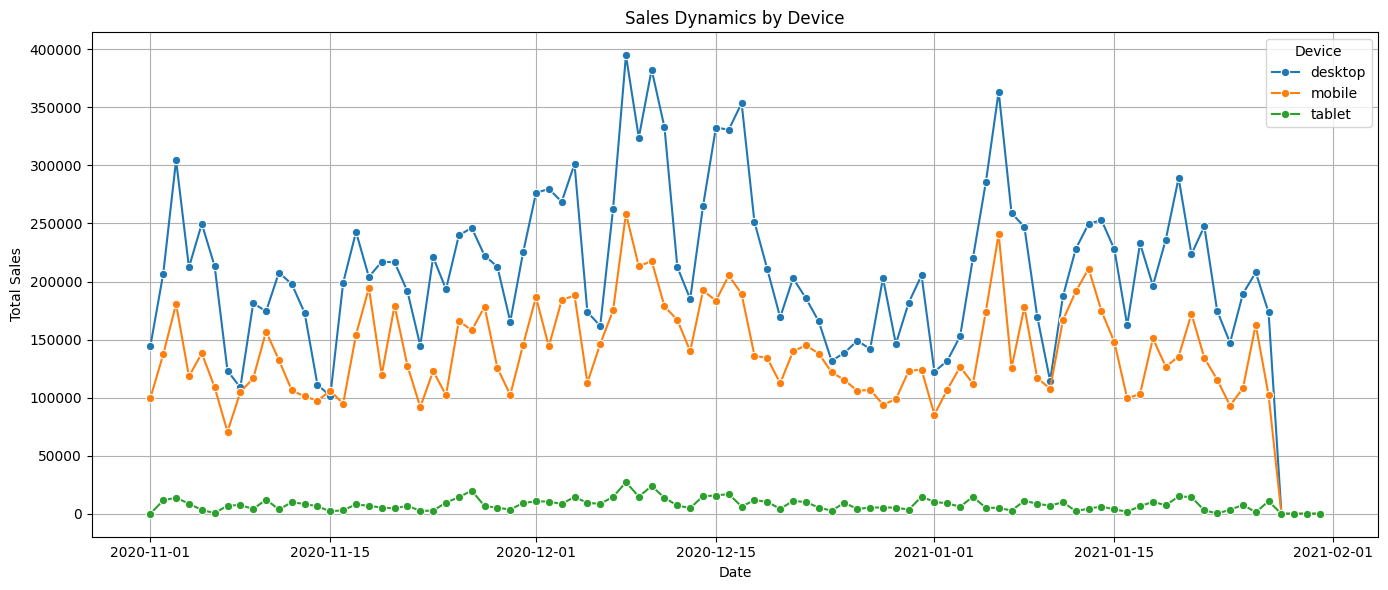

In [ ]:
# Групуємо за місяцем і дивайсом, рахуємо загальні продажі/Group by month and device, calculate total sales
daily_sales_device = df.groupby(["date", "device"])["price"].sum().reset_index()

# Створюємо графік динаміки продажів за дивайсом/Сreate a graph of sales dynamics by device
plt.figure(figsize=(14,6))
sns.lineplot(
    data=daily_sales_device,
    x="date",
    y="price",
    hue="device",
    marker="o"
)
plt.title("Sales Dynamics by Device")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend(title="Device")
plt.grid(True)
plt.tight_layout()
plt.show()


# UA
Згідно з графіком динаміки продажів по типах девайсів:
- Продажі через різні девайси мінливі протягом часу, спостерігаються піки та спади.
- Найбільші продажі здійснюються через desktop.
- Найменші продажі — через tablet.
Пікові дати продажів припадають на першу половину кожного місяця у наявних даних.
#EN
Based on the sales dynamics by device graph:
- Sales through different devices are variable over time, showing peaks and dips.
- Highest sales occur by desktop.
- Lowest sales occur by tablet.
Peak sales dates fall in the first half of each month in the available data.

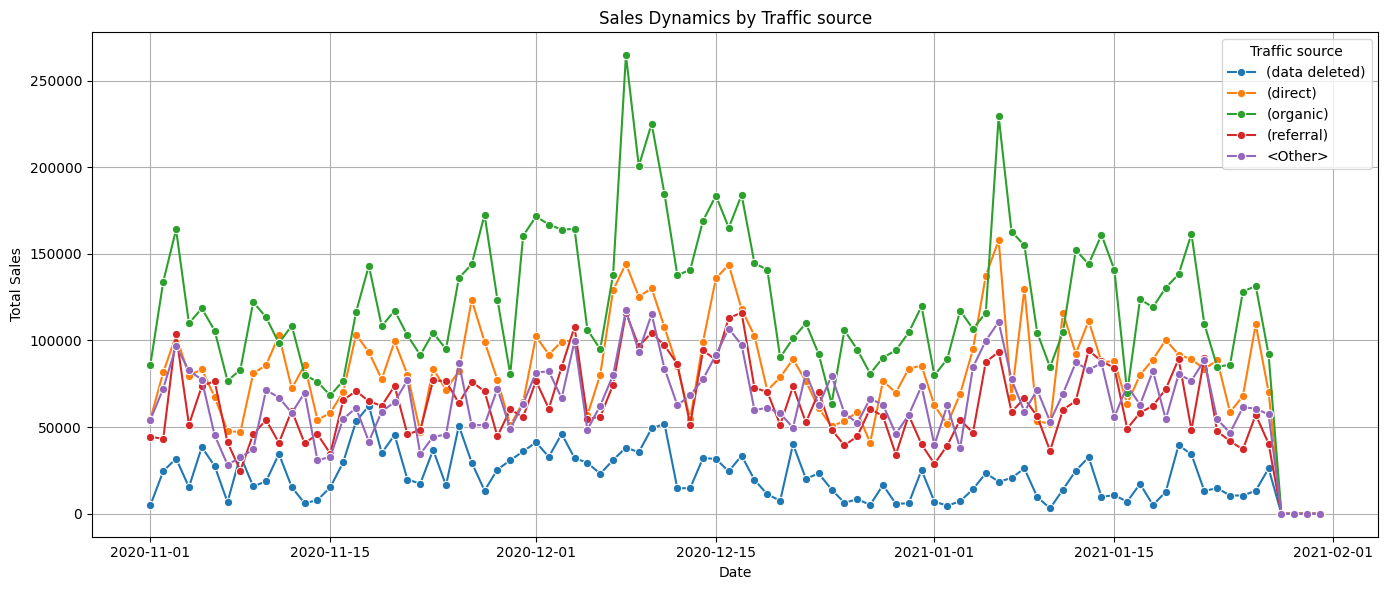

In [ ]:
# Групуємо за місяцем і каналу трафіку, рахуємо загальні продажі/Group by month and traffic source, calculate total sales
daily_sales_traffic = df.groupby(["date", "traffic_source"])["price"].sum().reset_index()

# Створюємо графік динаміки продажів за каналом трафіку/Сreate a graph of sales dynamics by traffic source
plt.figure(figsize=(14,6))
sns.lineplot(
    data=daily_sales_traffic,
    x="date",
    y="price",
    hue="traffic_source",
    marker="o"
)
plt.title("Sales Dynamics by Traffic source")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend(title="Traffic source")
plt.grid(True)
plt.tight_layout()
plt.show()

#UA
Згідно з графіком динаміки продажів по джерелах трафіку:
- Продажі за різними джерелами трафіку досить мінливі протягом часу.
- Найбільший пік продажів спостерігається для Organic.
- Найменші продажі зафіксовані для невизначеного каналу.
#EN
Based on the sales dynamics by traffic source graph:
- Sales across different traffic sources are quite variable over time.
- The highest sales peak occurs for Organic traffic.
- The lowest sales are observed for the undefined channel.

# Зведені таблиці/Summary tables

In [ ]:
# Створюємо зведену таблицю у розрізі каналу трафіку та девайсу/Creating a summary table by traffic channel and device
pivot_sessions = pd.pivot_table(
    df,
    index="traffic_source",
    columns="device",
    values="ga_session_id",
    aggfunc="count",
    fill_value=0)

print(pivot_sessions)

device          desktop  mobile  tablet
traffic_source                         
(data deleted)    12497    8448     469
(direct)          47825   31745    1812
(organic)         69431   46934    2659
(referral)        35890   24183    1363
<Other>           38786   25957    1546


In [ ]:
# Створюємо зведену таблицю у розрізі країни та категорій/Creating a summary table by category and country

# Визначаємо топ 5 країн з найбільми продажами/Determine the top 5 countries with the largest sales
top3_countries = df.groupby("country")['price'].sum().sort_values(ascending = False).head(3).index

# Визначаємо топ 10 категорій за загальною сумою продажів/Determine the top 10 categories by total sales
top10_categories = df.groupby("category")['price'].sum().sort_values(ascending = False).head(10).index

# Фільтруємо DataFrame по топ-країнах і топ-категоріях/Filtering the DataFrame by top countries and top categories
df_filtered = df[(df['country'].isin(top3_countries)) & (df['category'].isin(top10_categories))]

# Створюємо зведену таблицю/Creating a pivot table
pivot_category = pd.pivot_table(
    df_filtered,
    index="category",
    columns="country",
    values="price",
    aggfunc="sum",
    fill_value=0
)

print(pivot_category)


country                             Canada     India  United States
category                                                           
Bar furniture                      51724.0   57657.0       330805.0
Beds                              354772.0  358319.5      2213058.0
Bookcases & shelving units        278981.9  364507.4      1567606.9
Cabinets & cupboards              181802.0  191888.0       994545.5
Chairs                            417740.8  544309.2      2619773.8
Chests of drawers & drawer units   71952.0   73111.0       382388.0
Children's furniture               30264.0   39177.0       207575.0
Outdoor furniture                 185322.8  162289.4       929245.2
Sofas & armchairs                 692427.5  788430.0      3707144.5
Tables & desks                    132678.0  186157.5       777865.0


In [ ]:
# Створюємо зведену таблицю у розрізі країни та джерела трафіку/Creating a summary table by country and traffic source

# Визначаємо топ 10 країн з найбільми продажами/Determine the top 5 countries with the largest sales
top10_countries = df.groupby("country")['price'].sum().sort_values(ascending = False).head(10).index

# Фільтруємо DataFrame по топ-країнах /Filtering the DataFrame by top countries
df_filtered = df[df['country'].isin(top10_countries)]

# # Створюємо зведену таблицю/Creating a pivot table
pivot_avg_order = pd.pivot_table(
    df_filtered,
    index="country",
    columns="traffic_source",
    values="price",
    aggfunc="sum",
    fill_value=0)
print(pivot_avg_order)

traffic_source  (data deleted)   (direct)  (organic)  (referral)    <Other>
country                                                                    
Canada                133143.8   609806.3   847821.0    404162.7   442987.2
China                  35021.5   107324.3   217771.9     93358.5   134853.4
France                 38466.0   169299.5   247296.6    121023.4   134607.3
Germany                35275.5   132816.1   195957.0    124281.5   110891.3
India                 192489.5   700256.0   889529.2    464850.5   562636.8
Singapore              40784.9   103876.0   162799.6     84442.5    64544.2
Spain                  31165.0   166766.3   201278.4    121828.6   110508.4
Taiwan                 41014.0   138140.6   170218.8     94441.9   108895.0
United Kingdom         46206.5   203728.9   320413.9    147317.8   220650.8
United States         923060.1  3346860.3  4774846.2   2464690.8  2434096.5


#Statistical analysis

In [ ]:
#Визначаємо загальні продажі за кожною датою/Determine total sales for each date
daily_sales = df.groupby(["date"])["price"].sum().reset_index()
print("Total sales for each date:")
print(daily_sales)

#Визначаємо кількість сесій за кожною датою/Determine the number of sessions for each date
count_session = df.groupby(["date"])["ga_session_id"].count().reset_index()
print("Total sales for each date:")
print(count_session)

Total sales for each date:
         date     price
0  2020-11-01  244292.5
1  2020-11-02  355506.8
2  2020-11-03  498979.6
3  2020-11-04  339187.1
4  2020-11-05  391276.6
..        ...       ...
87 2021-01-27  286340.7
88 2021-01-28       0.0
89 2021-01-29       0.0
90 2021-01-30       0.0
91 2021-01-31       0.0

[92 rows x 2 columns]
Total sales for each date:
         date  ga_session_id
0  2020-11-01           2576
1  2020-11-02           3599
2  2020-11-03           5173
3  2020-11-04           4184
4  2020-11-05           3743
..        ...            ...
87 2021-01-27           4435
88 2021-01-28           4112
89 2021-01-29           3700
90 2021-01-30           2845
91 2021-01-31           2812

[92 rows x 2 columns]


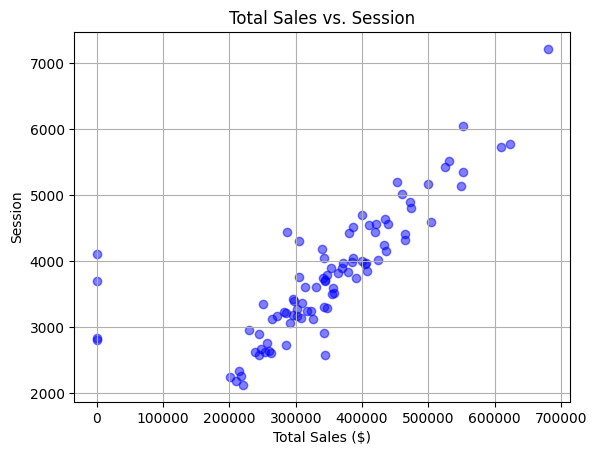

In [ ]:
# Будуємо графік для визначення кореляції/Create a graph to determine the correlation
plt.scatter(daily_sales["price"], count_session["ga_session_id"], color="blue", alpha=0.5)
plt.title("Total Sales vs. Session")
plt.xlabel("Total Sales ($)")
plt.ylabel("Session")
plt.grid(True)
plt.show()

#UA
Графік демонструє чітку позитивну залежність між кількістю сесій та загальними продажами: зі зростанням кількості сесій, обсяг продажів зазвичай збільшується.
Продажі та сесії — кількісні, але зазвичай не мають нормального розподілу тому для аналізу статистичної значущості і кореляції використаємо **метод Spearman**, який стійкий до викидів і краще підходить для бізнес-метрик.
#EN
The chart shows a clear positive relationship between the number of sessions and total sales: as the number of sessions increases, total sales generally increase.
Sales and sessions are quantitative variables, but they typically do not follow a normal distribution. Therefore, to assess statistical significance and correlation, the **Spearman method** is used, as it is robust to outliers and better suited for business metrics.





In [ ]:
from scipy.stats import spearmanr
# Розраховуємо p-value/Calculate p-value
print(
    f"Test statistic and p-value: {spearmanr(daily_sales['price'], count_session['ga_session_id'])}"
)
# Розраховуємо метод кореляції Spearman/Calculate Spearman correlation
spearman_corr = daily_sales['price'].corr(
    count_session['ga_session_id'], method="spearman"
)
print(f"Spearman Correlation: {spearman_corr}")

Test statistic and p-value: SignificanceResult(statistic=np.float64(0.865306217456368), pvalue=np.float64(9.755923586156684e-29))
Spearman Correlation: 0.865306217456368


#UA
У цьому випадку, з огляду на p-value < 0,05 та високе значення коефіцієнта кореляції (0,86), можна зробити висновок про наявність **статистично значущого сильного прямого зв’язку** між кількістю сесій та загальними продажами.
#EN
In this case, given that the p-value is < 0.05 and the correlation coefficient is high (0.86), we can conclude that there is a **statistically significant strong positive relationship** between the number of sessions and total sales.


In [ ]:
#Групуємо за датою та континентом загальні продажі/Group total sales by date and continent
df_pivot = df.pivot_table(index='date', columns='continent', values='price', aggfunc='sum')

#Загальні суми продажів за континенетом/Total sales by continent/
total_sales_by_continent = df_pivot.sum()

#Визначаємо 3 континената за сумою продажів/Identify 3 continents by sales volume
top3_continents = total_sales_by_continent.sort_values(ascending=False).head(3)

#Залишаємо 3 континента у зведеній таблиці/3 continents in the pivot table
top3_df = df_pivot[top3_continents.index].copy()
print(top3_df)



continent   Americas      Asia   Europe
date                                   
2020-11-01  132002.5   63823.0  46908.0
2020-11-02  193861.0   79370.0  75710.8
2020-11-03  294529.8  126737.8  67692.0
2020-11-04  200009.5   66602.0  65915.0
2020-11-05  182988.2  117608.4  86540.0
...              ...       ...      ...
2021-01-27  166735.5   66783.1  48156.1
2021-01-28       0.0       0.0      0.0
2021-01-29       0.0       0.0      0.0
2021-01-30       0.0       0.0      0.0
2021-01-31       0.0       0.0      0.0

[92 rows x 3 columns]


In [ ]:
# Створюємо DataFrame тільки з трьох континентів/Сreate a DataFrame from only three continents
data = top3_df[['Americas','Asia','Europe']]

# Розрахунок Spearman для матриці/Spearman calculation for a matrix
corr_matrix, p_values = spearmanr(data)

print("Spearman correlation matrix:")
print(corr_matrix)

print("\nP-values matrix:")
print(p_values)


Spearman correlation matrix:
[[1.         0.70990166 0.67257005]
 [0.70990166 1.         0.65711027]
 [0.67257005 0.65711027 1.        ]]

P-values matrix:
[[0.00000000e+00 2.32337963e-15 2.10355887e-13]
 [2.32337963e-15 0.00000000e+00 1.12909472e-12]
 [2.10355887e-13 1.12909472e-12 0.00000000e+00]]


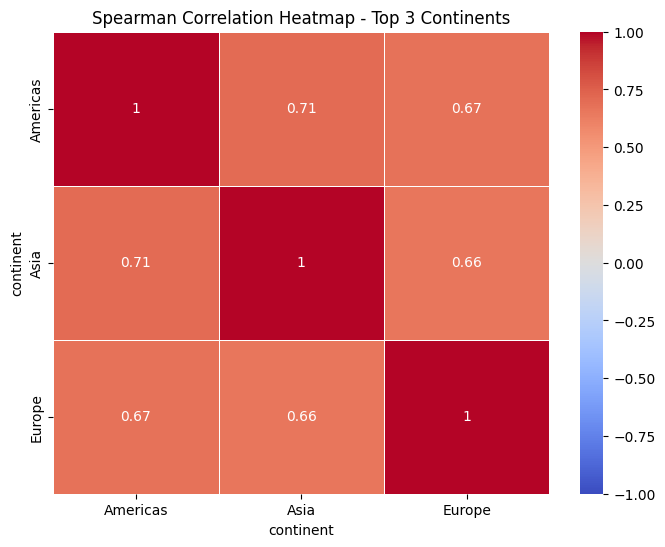

In [ ]:
# Кореляційна матриця/Correlation matrix
spearman_corr = data.corr(method='spearman')

# Побудова heatmap/Create heatmap
plt.figure(figsize=(8,6))
sns.heatmap(
    spearman_corr,
    annot=True,
    cmap='coolwarm',
    vmin=-1, vmax=1,
    linewidths=0.5,
    xticklabels=spearman_corr.columns,
    yticklabels=spearman_corr.index)
plt.title("Spearman Correlation Heatmap - Top 3 Continents")
plt.show()

#UA
Для топ-3 континентів (Americas, Asia, Europe) спостерігається статистично значуща помірно сильна позитивна кореляція продажів між усіма парами континентів.
Значення між 0.66–0.71 → помірно сильний позитивний зв’язок
Всі кореляції <1, тобто продажі континентів не ідентичні, але тенденції схожі
Всі p-value ≈ 0 → зв’язки статистично значущі.

#EN
For the top 3 continents (Americas, Asia, Europe), there is a statistically significant moderately strong positive correlation in sales between all pairs of continents.
The correlation values range from 0.66 to 0.71, indicating a moderately strong positive relationship.
All correlations are less than 1, meaning the sales of the continents are not identical, but the trends are similar.
All p-values are approximately 0, indicating that the relationships are statistically significant.


In [ ]:
# Агрегуємо продажі по датах і каналах / Aggregate sales by dates and channels
data_channel = df.groupby(['date','channel'])['price'].sum().reset_index()

# Створюємо зведену таблицю / Creating a pivot table
channel_pivot = data_channel.pivot(index='date', columns='channel', values='price')

# Кореляція Spearman між каналами / Spearman correlation between channels
spearman_corr = channel_pivot.corr(method='spearman')
print("Spearman correlation between channels:")
print(spearman_corr)

# Розрахунок Spearman для матриці/Spearman calculation for a matrix
corr_matrix, p_values = spearmanr(channel_pivot)

print("\nSpearman correlation matrix:")
print(corr_matrix)

print("\nP-values matrix:")
print(p_values)

Spearman correlation between channels:
channel           Direct  Organic Search  Paid Search  Social Search  \
channel                                                                
Direct          1.000000        0.779663     0.729369       0.469342   
Organic Search  0.779663        1.000000     0.793381       0.461543   
Paid Search     0.729369        0.793381     1.000000       0.492725   
Social Search   0.469342        0.461543     0.492725       1.000000   
Undefined       0.556922        0.524677     0.556491       0.462530   

channel         Undefined  
channel                    
Direct           0.556922  
Organic Search   0.524677  
Paid Search      0.556491  
Social Search    0.462530  
Undefined        1.000000  

Spearman correlation matrix:
[[1.         0.77966337 0.72936897 0.46934246 0.55692222]
 [0.77966337 1.         0.79338142 0.4615432  0.52467709]
 [0.72936897 0.79338142 1.         0.49272481 0.55649064]
 [0.46934246 0.4615432  0.49272481 1.         0.46252967

# UA
Між каналами продажів спостерігається помірно сильна та сильна позитивна кореляція. Всі кореляції є статистично значущими (p-value < 0.001)
, тобто можна з високою впевненістю стверджувати, що ці зв’язки не випадкові.

#EN
A moderate to strong positive correlation is observed between sales channels. All correlations are statistically significant (p-value < 0.001), indicating robust relationships between the channels and allowing us to state with high confidence that these associations are not due to random chance.

In [ ]:
#Групуємо за датою та категорією загальні продажі/Group total sales by date and category
df_pivot_category = df.pivot_table(index='date', columns='category', values='price', aggfunc='sum')

#Загальні суми продажів за категорією/Total sales by category
total_sales_by_category = df_pivot_category.sum().sort_values(ascending=False).head(5)

#Залишаємо 5 категорій у зведеній таблиці/5 categories in the pivot table
top5_df = df_pivot_category[total_sales_by_category.index].copy()
print(top5_df)

category    Sofas & armchairs   Chairs     Beds  Bookcases & shelving units  \
date                                                                          
2020-11-01            75216.0  46006.0  14041.0                     36701.0   
2020-11-02            79977.5  58834.0  79683.5                     40979.0   
2020-11-03           175594.0  61204.0  66219.5                     64360.1   
2020-11-04            86861.5  44113.0  48939.0                     35719.8   
2020-11-05           137288.0  90388.4  23449.0                     40998.8   
...                       ...      ...      ...                         ...   
2021-01-23            76898.0  57493.0  37116.0                     29862.7   
2021-01-24            57837.0  54288.0  23294.0                     25396.0   
2021-01-25            84544.0  51424.2  47303.5                     25919.6   
2021-01-26            85431.0  96216.2  69894.5                     39119.2   
2021-01-27            51354.0  48153.0  43080.0     

In [ ]:
# Кореляція Spearman між топ 5 категорій/ Spearman correlation between channels top 5 categories
spearman_corr_category = top5_df.corr(method='spearman')
print("Spearman correlation between categories:")
print(spearman_corr_category)

# Розрахунок Spearman для матриці/Spearman calculation for a matrix
corr_matrix, p_values = spearmanr(spearman_corr_category)

print("\nSpearman correlation matrix:")
print(corr_matrix)

print("\nP-values matrix:")
print(p_values)

Spearman correlation between categories:
category                    Sofas & armchairs    Chairs      Beds  \
category                                                            
Sofas & armchairs                    1.000000  0.583319  0.521715   
Chairs                               0.583319  1.000000  0.534941   
Beds                                 0.521715  0.534941  1.000000   
Bookcases & shelving units           0.625603  0.636751  0.542742   
Cabinets & cupboards                 0.631204  0.526822  0.440368   

category                    Bookcases & shelving units  Cabinets & cupboards  
category                                                                      
Sofas & armchairs                             0.625603              0.631204  
Chairs                                        0.636751              0.526822  
Beds                                          0.542742              0.440368  
Bookcases & shelving units                    1.000000              0.528706  
C

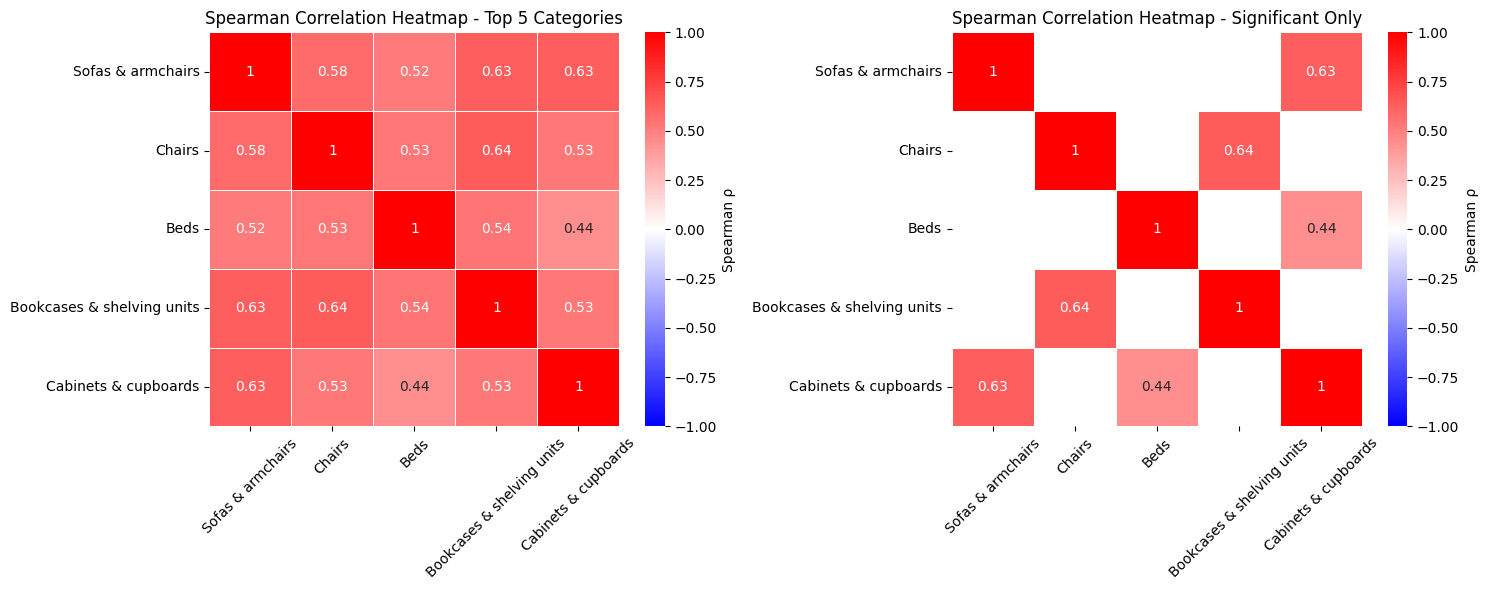

In [ ]:
# Маска для незначущих кореляцій / Mask for insignificant correlations
mask = p_values >= 0.05

# Створюємо фігуру з двома підграфіками / Creating a shape with two subgraphs
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Лівий графік: просто кореляції / Left graph: just correlations
sns.heatmap(
    spearman_corr_category,
    annot=True,
    cmap='bwr',
    vmin=-1, vmax=1,
    linewidths=0.5,
    xticklabels=spearman_corr_category.columns,
    yticklabels=spearman_corr_category.index,
    cbar_kws={"label": "Spearman ρ"},
    ax=ax[0]
)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
ax[0].set_xlabel("")
ax[0].set_ylabel("")
ax[0].set_title("Spearman Correlation Heatmap - Top 5 Categories")


# Правий графік: лише значущі кореляції / Right graph: only significant correlations
sns.heatmap(
    spearman_corr_category,
    annot=True,
    cmap='bwr',
    vmin=-1, vmax=1,
    linewidths=0.5,
    xticklabels=spearman_corr_category.columns,
    yticklabels=spearman_corr_category.index,
    mask=mask,  # приховуємо незначущі кореляції / hide insignificant correlations
    cbar_kws={"label": "Spearman ρ"},
    ax=ax[1]
)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
ax[1].set_xlabel("")
ax[1].set_ylabel("")
ax[1].set_title("Spearman Correlation Heatmap - Significant Only")

plt.tight_layout()
plt.show()


#UA
Між окремими категоріями спостерігається сильна позитивна та негативна кореляція, яка є статистично значущою (p-value < 0.05). Водночас більшість пар змінних не демонструють статистично підтвердженого зв’язку, що свідчить про відсутність стабільної монотонної залежності між ними.

#EN

Strong positive and negative correlations are observed between certain categories, and these correlations are statistically significant (p-value < 0.05). At the same time, most pairs of variables do not show statistically confirmed relationships, indicating the absence of a consistent monotonic association between them.


In [ ]:
# Групуємо дані: кількість продажів за категоріями / Grouping data: number of sales by category
category_sales = df.groupby(['category', 'is_verified'])['price'].sum().unstack(fill_value=0)
print("Total sales by category and verification status:")
print(category_sales) #(0 = не верифікований, 1 = верифікований) / (0 = not verified, 1 = verified)

Total sales by category and verification status:
is_verified                                  0         1
category                                                
Bar furniture                          13254.0   37760.0
Beds                                  132055.5  262649.5
Bookcases & shelving units             75304.8  200204.8
Cabinets & cupboards                   58241.0  157628.5
Café furniture                          4354.0    9027.0
Chairs                                147583.6  392372.6
Chests of drawers & drawer units       11604.0   46384.0
Children's furniture                   15568.0   34667.0
Nursery furniture                       1909.0    5770.0
Outdoor furniture                      49379.2   94315.0
Room dividers                           2617.0    5676.0
Sideboards, buffets & console tables    1410.0    8795.0
Sofas & armchairs                     168234.0  492222.0
Tables & desks                         34987.0  118546.0


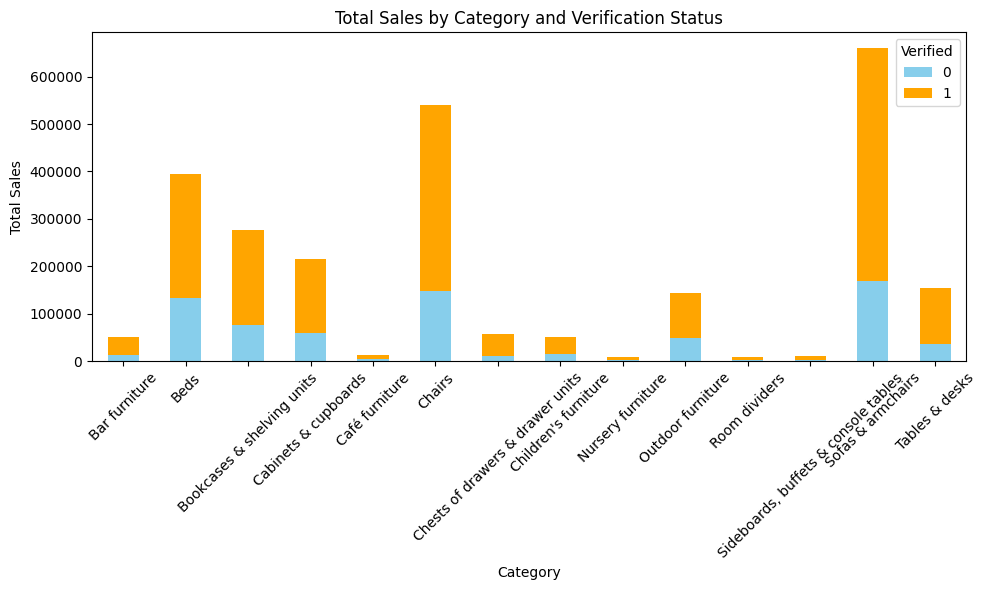

In [ ]:
# Будуємо графік / Create a graph
category_sales.plot(kind='bar', stacked=True, figsize=(10,6), color=['skyblue','orange'])
plt.title("Total Sales by Category and Verification Status")
plt.ylabel("Total Sales")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.legend(title="Verified")
plt.tight_layout()
plt.show()

In [ ]:
# Формування вибірок (агрегація по даті) / Sample formation (aggregation by date)
daily_sales = (df.groupby(['date', 'is_verified'])['price'].sum().reset_index())

# Створення двох вибірок / Creating two samples

sales_not_verified = daily_sales[daily_sales['is_verified'] == 0]['price']

sales_verified = daily_sales[daily_sales['is_verified'] == 1]['price']

# Перевірка нормальності розподілу (Shapiro–Wilk) / Testing for normality of distribution (Shapiro–Wilk)

from scipy.stats import shapiro

shapiro_verified = shapiro(sales_verified)

shapiro_not_verified = shapiro(sales_not_verified)

print("Verified:", shapiro_verified)
print("Not verified:", shapiro_not_verified)


Verified: ShapiroResult(statistic=np.float64(0.9766780900675172), pvalue=np.float64(0.11325964679068223))
Not verified: ShapiroResult(statistic=np.float64(0.8633294911116404), pvalue=np.float64(1.660135980785686e-07))


In [ ]:
# Виконуємо тест Манна-Уітні / Perform the Mann-Whitney test
from scipy.stats import mannwhitneyu

u_stat, p_value = mannwhitneyu(sales_not_verified,sales_verified)

print(f"U-statistic: {u_stat}")
print(f"p-value: {p_value}")

U-statistic: 597.0
p-value: 3.3672889331306305e-22


#UA
Перевірка нормальності за критерієм Shapiro–Wilk показала, що розподіл денних продажів зареєстрованих користувачів не відхиляється від нормального (p = 0.11), тоді як для незареєстрованих користувачів нормальність порушена (p < 0.001). У зв’язку з цим для порівняння вибірок було застосовано непараметричний Mann–Whitney U test. Результати тесту свідчать, що денні продажі за участі зареєстрованих користувачів є статистично значуще вищими порівняно з днями з незареєстрованими користувачами.
#EN
The Shapiro–Wilk normality test indicated that the distribution of daily sales for registered users does not significantly deviate from normality (p = 0.11), whereas the distribution for unregistered users violates the normality assumption (p < 0.001). Therefore, a non-parametric Mann–Whitney U test was applied to compare the two samples. The test results show that daily sales associated with registered users are statistically significantly higher than those associated with unregistered users.

In [ ]:
# Фільтруємо сесії по континентах / Filter sessions by continent
europe_sessions = df[df['continent'] == 'Europe']
america_sessions = df[df['continent'] == 'Americas']

# Кількість сесій по девайсу і загальна кількість / Number of sessions per device and total number
desktop_europe = (europe_sessions['device'] == 'desktop').sum()
total_europe = len(europe_sessions)

desktop_america = (america_sessions['device'] == 'desktop').sum()
total_america = len(america_sessions)

print(f"Europe: {desktop_europe}/{total_europe}({desktop_europe/total_europe:.2%})")
print(f"America: {desktop_america}/{total_america}({desktop_america/total_america:.2%})")


Europe: 38132/65135(58.54%)
America: 113016/193179(58.50%)


In [ ]:
# Кількість "успіхів" у кожній групі / Number of "successes" in each group
successes = [desktop_europe, desktop_america]

# Загальна кількість у кожній групі / Total number in each group
nobs = [total_europe, total_america]

# Z-test
from statsmodels.stats.proportion import proportions_ztest

stat, p_value = proportions_ztest(count=successes, nobs=nobs)
print(f"Z-statistic: {stat:.4f}, p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Result: Statistically significant difference for desktop devices")
else:
    print("Result: No statistically significant difference for desktop devices")

Z-statistic: 0.1782, p-value: 0.8586
Result: No statistically significant difference for desktop devices


#UA
Згідно з проведеним Z-тестом, немає статистично значущої різниці в кількості сесій за комп'ютером між Америкою та Європою, оскільки p-значення становить 0,8586.
#EN
According to the conducted Z-test, there is no statistically significant difference in desktop sessions between the Americas and Europe, as the p-value is 0.8586



In [ ]:
# Фільтруємо дані / Filtering data
df_fil_cont = df[(df['device'] == 'mobile') & (df['channel'] == 'Direct')]

# Визначаємо топ-3 континенти за кількістю транзакцій / Determine the top 3 continents by the number of transactions
top3_continents = df_fil_cont['continent'].value_counts().nlargest(3).index.tolist()
print(f"Top 3 continents: {top3_continents}")

# Агрегуємо дані по днях (денний середній продаж) / Aggregate data by day (daily average sales)
daily_avg = df_fil_cont[df_fil_cont['continent'].isin(top3_continents)].groupby(['date', 'continent'])['price'].mean().reset_index()

# Створюємо групи для Kruskal-Wallis / Creating groups for Kruskal-Wallis
groups = [daily_avg[daily_avg['continent'] == cont]['price'].values
          for cont in top3_continents]

# Kruskal-Wallis test
from scipy.stats import kruskal

h_stat, p_value = kruskal(*groups)
print(f"H-statistic: {h_stat:.2f}, p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Result: The average daily sales are statistically different among the top 3 continents")
else:
    print("Result: No statistically significant differences were found among the top 3 continents")


Top 3 continents: ['Americas', 'Asia', 'Europe']
H-statistic: nan, p-value: nan
Result: No statistically significant differences were found among the top 3 continents


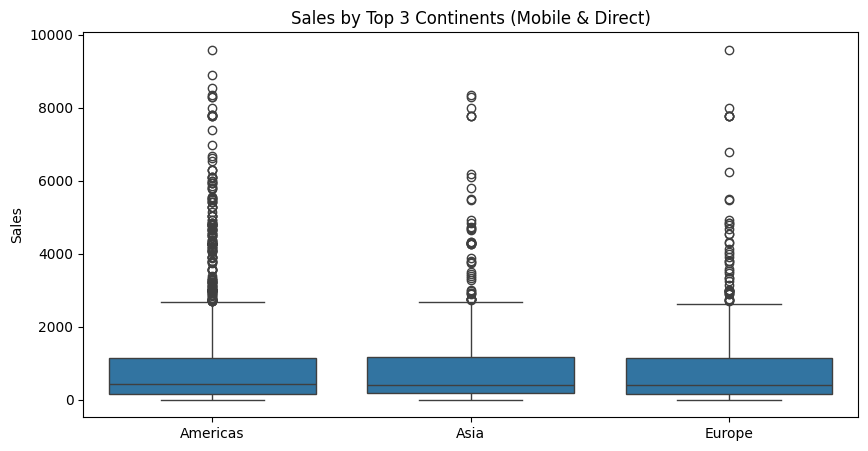

In [ ]:
# Будуємо графік / Create a graph
plt.figure(figsize=(10,5))
sns.boxplot(data=df_fil_cont[df_fil_cont['continent'].isin(top3_continents)],
            x='continent', y='price', order=top3_continents)
plt.title('Sales by Top 3 Continents (Mobile & Direct)')
plt.xlabel('')
plt.ylabel('Sales')
plt.show()


#UA
Середні продажі для мобільного пристрою та Direct каналу практично однакові між Americas, Asia та Europe
Статистично значущих відмінностей немає.
Будь-який тест (ANOVA, Kruskal–Wallis) у такій ситуації буде повертати NaN або незначущий результат.

#EN
The average sales for mobile devices and the Direct channel are practically the same across the Americas, Asia, and Europe. No statistically significant differences were found. Any test (ANOVA or Kruskal–Wallis) in this situation would return NaN or a non-significant result.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Зберегти у папку на Google Drive/ Save to a folder on Google Drive
df.to_csv('/content/drive/MyDrive/data_for_tableau.csv', index=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Проект аналітики продажів/ Sales Analytics Project

#UA
Остаточна візуалізація доступна в Tableau:

#EN
Final visualization is available in Tableau:

🔗 Tableau Dashboard:  
https://public.tableau.com/app/profile/iryna.yankova/viz/SalesPerformanceInsightDashboard/SalesPerformanceInsightsDashboard
